In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


In [34]:
a = [1,2,3,4]
print(a[1:-1])

[2, 3]


In [31]:
a = np.array([1,2,3])

In [32]:
b = np.array([5]) + a

In [33]:
b

array([6, 7, 8])

In [13]:
#ВАР 4, K = 1, L = 5

In [14]:
# a, b = 0, 1.5
# f = lambda t: (6 - t) * t
# y = lambda t: np.cos(2 * t)


a, b = -0.9, 0.9
f = lambda t: (2 - t)**2
y = lambda t: np.cos(3 * t)

In [15]:
def gram_schmidt(n):
    phi = []
    norms = []
    
    phi0 = lambda t: 1
    norm0, _ = quad(lambda t: phi0(t) ** 2 * f(t), a, b)
    phi.append(phi0)
    norms.append(norm0)
    
    for k in range(1, n):
        def new_phi(t, k=k, phi=phi, norms=norms):
            term = t ** k
            for i in range(k):
                integrand = lambda t: (t ** k) * phi[i](t) * f(t)
                coef, _ = quad(integrand, a, b)
                coef /= norms[i]
                term -= coef * phi[i](t)
            return term
        phi_k = new_phi
        print(f"new_phi {k}: {phi_k}")
        norm_k, _ = quad(lambda t: phi_k(t) ** 2 * f(t), a, b)
        phi.append(phi_k)
        norms.append(norm_k)
    return phi, norms

In [16]:
def fourier_coeffs(y, phi, norms, N):
    coeffs = []
    for n in range(N):
        integrand = lambda t: y(t) * phi[n](t) * f(t)
        c_n, _ = quad(integrand, a, b)
        c_n /= norms[n]
        coeffs.append(c_n)
    print("Coefs finded")
    return coeffs
    
    
def fourier_partial_sum(t, coeffs, phi):
    return sum(c * phi_k(t) for c, phi_k in zip(coeffs, phi))

In [17]:
def compute_error(y, coeffs, phi, norms):
    norm_y_sq, _ = quad(lambda t: y(t) ** 2 * f(t), a, b)
    norm_SN_sq = sum(c ** 2 * n for c, n in zip(coeffs, norms))
    error_sq = norm_y_sq - norm_SN_sq

    print("Error computed")
    return np.sqrt(error_sq)

In [18]:
def plot_results(y, phi, coeffs, eps):
    t_vals = np.linspace(a, b, 100)
    y_vals = y(t_vals)
    # График y(t)
    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, y_vals, label='y(t) = cos(2t)', linewidth=2)
    for N in range(1, len(coeffs) + 1):
        S_N = lambda t: fourier_partial_sum(t, coeffs[:N], phi[:N])
        S_N_vals = np.array([S_N(t) for t in t_vals])
        plt.plot(t_vals, S_N_vals, '--', label=f'$S_{N}(t)$')
        
    plt.title(f'Приближение $y(t)$ частичными суммами ряда Фурье ($\epsilon = {eps}$)')
    plt.xlabel('$t$')
    plt.legend()
    plt.grid()
    plt.show()
    plt.figure(figsize=(10, 6))
    for n in range(len(phi)):
        phi_n_vals = np.array([phi[n](t) for t in t_vals])
        plt.plot(t_vals, phi_n_vals, label=f'$\phi_{n}(t)$')
    plt.title('Ортогональные многочлены $\phi_n(t)$')
    plt.xlabel('$t$')
    plt.legend()
    plt.grid()
    plt.show()


In [19]:
def main(eps_list=[1e-1, 1e-2, 1e-3]):
    for eps in eps_list:
        N = 1
        while True:
            phi, norms = gram_schmidt(N)
            coeffs = fourier_coeffs(y, phi, norms, N)
            error = compute_error(y, coeffs, phi, norms)
            print(f"Main iteration {N}")
            if error < eps or N >= 10:
                break
            N += 1
        print(f"Для = {eps}: N = {N}, ошибка = {error:.4g}")
        plot_results(y, phi, coeffs, eps)

Coefs finded
Error computed
Main iteration 1
new_phi 1: <function gram_schmidt.<locals>.new_phi at 0x7f0b1f08b3a0>
Coefs finded
Error computed
Main iteration 2
new_phi 1: <function gram_schmidt.<locals>.new_phi at 0x7f0b1f08b280>
new_phi 2: <function gram_schmidt.<locals>.new_phi at 0x7f0b1f08b1f0>
Coefs finded
Error computed
Main iteration 3
new_phi 1: <function gram_schmidt.<locals>.new_phi at 0x7f0b1f08b160>
new_phi 2: <function gram_schmidt.<locals>.new_phi at 0x7f0b1f08b550>
new_phi 3: <function gram_schmidt.<locals>.new_phi at 0x7f0b1f08b5e0>
Coefs finded
Error computed
Main iteration 4
Для = 0.1: N = 4, ошибка = 0.004264


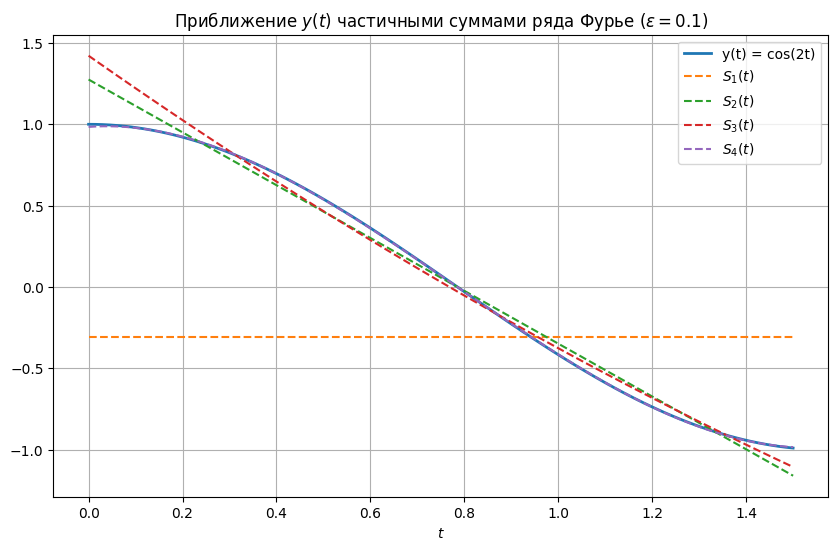

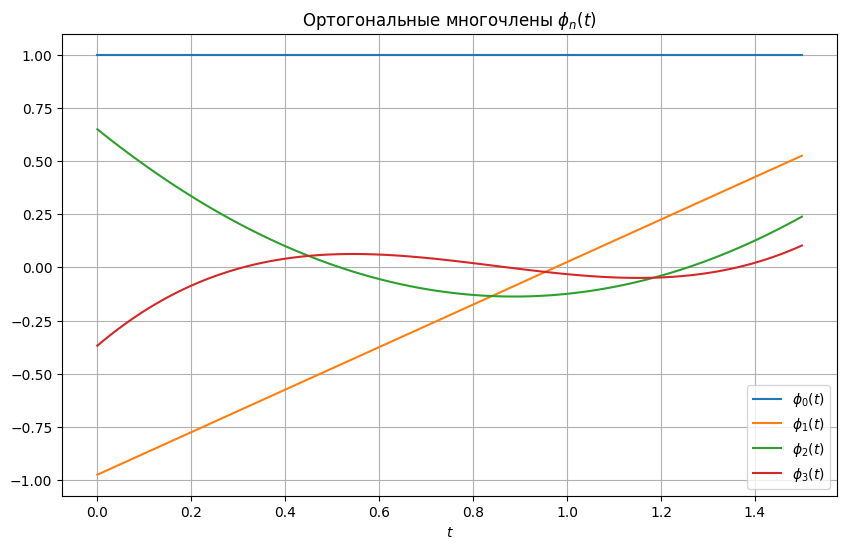

Coefs finded
Error computed
Main iteration 1
new_phi 1: <function gram_schmidt.<locals>.new_phi at 0x7f0b1ef784c0>
Coefs finded
Error computed
Main iteration 2
new_phi 1: <function gram_schmidt.<locals>.new_phi at 0x7f0b1efd3280>
new_phi 2: <function gram_schmidt.<locals>.new_phi at 0x7f0b1efd3040>
Coefs finded
Error computed
Main iteration 3
new_phi 1: <function gram_schmidt.<locals>.new_phi at 0x7f0b1ef52670>
new_phi 2: <function gram_schmidt.<locals>.new_phi at 0x7f0b1ef52700>
new_phi 3: <function gram_schmidt.<locals>.new_phi at 0x7f0b1ef52790>
Coefs finded
Error computed
Main iteration 4
Для = 0.01: N = 4, ошибка = 0.004264


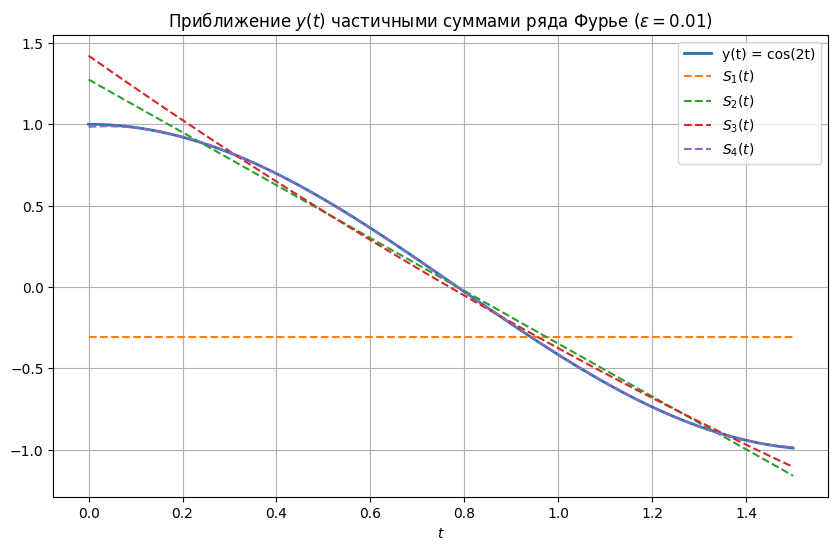

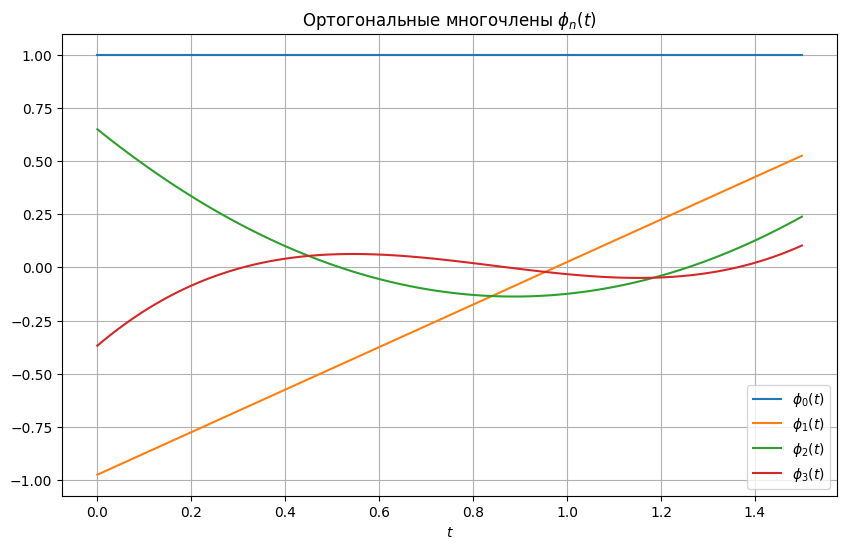

Coefs finded
Error computed
Main iteration 1
new_phi 1: <function gram_schmidt.<locals>.new_phi at 0x7f0b1ccee550>
Coefs finded
Error computed
Main iteration 2
new_phi 1: <function gram_schmidt.<locals>.new_phi at 0x7f0b1ccee790>
new_phi 2: <function gram_schmidt.<locals>.new_phi at 0x7f0b1cceed30>
Coefs finded
Error computed
Main iteration 3
new_phi 1: <function gram_schmidt.<locals>.new_phi at 0x7f0b1cc83310>
new_phi 2: <function gram_schmidt.<locals>.new_phi at 0x7f0b1cc833a0>
new_phi 3: <function gram_schmidt.<locals>.new_phi at 0x7f0b1cc83430>
Coefs finded
Error computed
Main iteration 4
new_phi 1: <function gram_schmidt.<locals>.new_phi at 0x7f0b1ccee5e0>
new_phi 2: <function gram_schmidt.<locals>.new_phi at 0x7f0b1cc83550>
new_phi 3: <function gram_schmidt.<locals>.new_phi at 0x7f0b1cc835e0>
new_phi 4: <function gram_schmidt.<locals>.new_phi at 0x7f0b1ccb9dc0>
Coefs finded
Error computed
Main iteration 5
new_phi 1: <function gram_schmidt.<locals>.new_phi at 0x7f0b1cc839d0>
new_p

KeyboardInterrupt: 

In [20]:
main()